In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

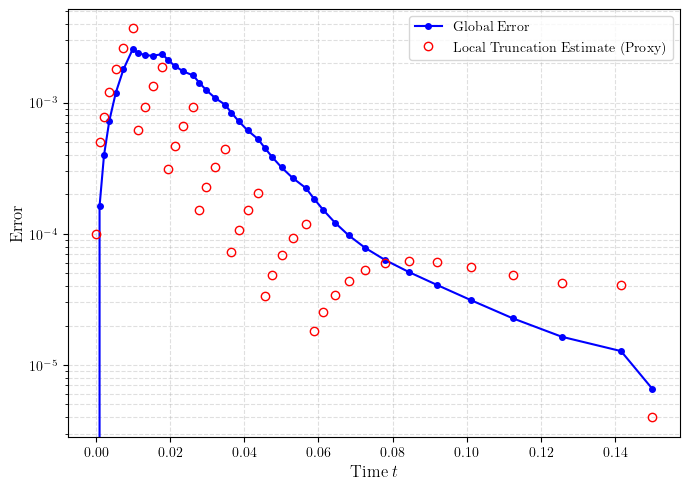

In [2]:
def adaptive_stepping_demo():
    # dx/dt = -100x, x(0) = 1
    f = lambda t, x: -100 * x
    x_exact = lambda t: np.exp(-100 * t)
    
    t_current = 0
    x_current = 1.0
    dt = 0.001
    t_max = 0.15
    
    tol_abs = 1e-4
    tol_rel = 1e-4
    
    t_history = [t_current]
    x_history = [x_current]
    global_errors = [0]
    local_error_estimates = [1e-4]
    dt_history = [dt]
    
    while t_current < t_max:
        x_mid = x_current + (dt / 2) * f(t_current, x_current)
        t_mid = t_current + dt / 2
        
        x_next = x_current + dt * f(t_mid, x_mid)
        
        flux_term = f(t_current, x_current) + f(t_current + dt, x_next) - 2 * f(t_mid, x_mid)
        error_proxy = abs(dt * flux_term)
        
        tolerance = tol_abs + tol_rel * abs(f(t_current, x_current))
        
        if error_proxy <= tolerance:
            t_current += dt
            x_current = x_next
            
            t_history.append(t_current)
            x_history.append(x_current)
            
            exact = x_exact(t_current)
            g_err = abs(exact - x_current)
            global_errors.append(g_err)
            local_error_estimates.append(error_proxy)
            dt_history.append(dt)
            
            dt = min(dt * 1.2, t_max - t_current)
            
        else:
            dt = dt * 0.5
            if dt < 1e-16:
                print("Step size underflow")
                break

    plt.figure(figsize=(7, 5))
    
    plt.semilogy(t_history, global_errors, 'b.-', label='Global Error', linewidth=1.5, markersize=8)
    plt.semilogy(t_history, local_error_estimates, 'ro', label='Local Truncation Estimate (Proxy)', markerfacecolor='none')
    
    # plt.title(r'Adaptive Stepping: $dx/dt = -100x$', fontsize=14)
    plt.xlabel('Time $t$', fontsize=12)
    plt.ylabel('Error', fontsize=12)
    plt.legend()
    plt.grid(True, which="both", ls="--", alpha=0.4)
    
    plt.tight_layout()
    plt.savefig('../../../figs/ode/adaptive_stepping_demo.pdf', transparent=True, bbox_inches='tight')
    plt.show()

adaptive_stepping_demo()